
--- First 5 Rows of Data ---
   Ad_Spend  Discount(%)  Footfall  Monthly_Sales
0      2000            5       120          25000
1      3000            6       140          30000
2      4000            7       160          35000
3      5000            8       180          42000
4      6000           10       200          48000

Model Coefficients (β values):
 [[3.39542857e+03]
 [2.32000000e+00]
 [7.77142857e+02]
 [1.11885714e+02]]

Mean Squared Error: 806857.1428571413
R² Score: 0.9975461295494141

5-Fold Cross Validation Results:
MSE: [16532405.930986196, 1485384.3747383505, 909228.6327314049, 4283986.109837095, 892361.1111246267]
Average MSE: 4820673.231883535

R²: [0.9673433956918791, 0.9933982916678296, 0.9959589838545271, 0.9851765186510827, 0.9889831961589552]
Average R²: 0.9861720772048548

Forecasted Monthly Sales: 57698.285714290636


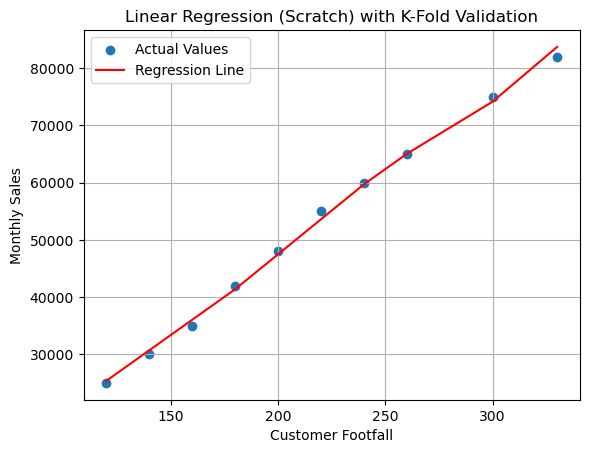

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# ---------------- SAMPLE DATASET ----------------
data = pd.DataFrame({
    'Ad_Spend': [2000,3000,4000,5000,6000,7000,8000,9000,10000,12000],
    'Discount(%)': [5,6,7,8,10,12,14,15,18,20],
    'Footfall': [120,140,160,180,200,220,240,260,300,330],
    'Monthly_Sales': [25000,30000,35000,42000,48000,55000,60000,65000,75000,82000]
})

print("\n--- First 5 Rows of Data ---")
print(data.head())

# ---------------- FEATURES & TARGET ----------------
X = data[['Ad_Spend', 'Discount(%)', 'Footfall']].values
y = data['Monthly_Sales'].values.reshape(-1,1)

# ADD BIAS COLUMN
X_b = np.hstack([np.ones((X.shape[0],1)), X])

# ---------------- NORMAL EQUATION (Linear Regression From Scratch) ----------------
beta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print("\nModel Coefficients (β values):\n", beta)

# Prediction Function
def predict(X_vals):
    X_vals = np.hstack([np.ones((X_vals.shape[0],1)), X_vals])
    return X_vals @ beta

y_pred = predict(X)

# ---------------- METRICS ----------------
mse = np.mean((y - y_pred)**2)
r2 = 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

print("\nMean Squared Error:", mse)
print("R² Score:", r2)

# ---------------- K-FOLD USING SKLEARN ----------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_list = []
r2_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Add bias
    X_train_b = np.hstack([np.ones((X_train.shape[0],1)), X_train])
    X_test_b = np.hstack([np.ones((X_test.shape[0],1)), X_test])

    # Compute β for each fold (Scratch)
    beta_fold = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train
    y_pred_fold = X_test_b @ beta_fold

    mse_fold = np.mean((y_test - y_pred_fold)**2)
    r2_fold = 1 - (np.sum((y_test - y_pred_fold)**2) / np.sum((y_test - np.mean(y_test))**2))

    mse_list.append(mse_fold)
    r2_list.append(r2_fold)

print("\n5-Fold Cross Validation Results:")
print("MSE:", mse_list)
print("Average MSE:", np.mean(mse_list))
print("\nR²:", r2_list)
print("Average R²:", np.mean(r2_list))

# ---------------- SAMPLE FORECAST ----------------
sample = np.array([[8000, 10, 250]])
forecast = predict(sample)[0][0]
print("\nForecasted Monthly Sales:", forecast)

# ---------------- REGRESSION PLOT ----------------
sorted_idx = np.argsort(data['Footfall'])
plt.scatter(data['Footfall'], y, label="Actual Values")
plt.plot(data['Footfall'].values[sorted_idx], y_pred.flatten()[sorted_idx], color='red', label="Regression Line")
plt.xlabel("Customer Footfall")
plt.ylabel("Monthly Sales")
plt.title("Linear Regression (Scratch) with K-Fold Validation")
plt.legend()
plt.grid(True)
plt.show()
